<h3 align="center">Outliers (or Outliars?!)</h3>

![](https://miro.medium.com/max/1400/1*-mnl6wOE21tCiQG-nDFVdg.png) 

### Exercise 1

#### Create box plots on a single set of axes for all five experiments in the morley data set.

In this exercise I had to create a box plot to represent all 5 experiments in the morley dataset on one set of axes.
I started by pulling the data from a folder that I have added in the 'Practicals' folder attached to these exercises, and designated the 5 'samples' representing the 5 experiments. I also told the program to ignore commas (as the dataset is a comma seperated values file) and quotation marks, along with the first column in the dataset; which was the sample numbers, as none of these were of benefit to the boxplot.

I then plotted the 5 samples onto the boxplot and labelled the axes.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# choose where we pull the dataset from.
data = np.genfromtxt('data_sets/morley.csv', skip_header=1, delimiter=',', deletechars='"')

In [3]:
print(data.dtype)

float64


In [4]:
# ignore the useless info from the dataset. 
data = data[:,1:]

In [5]:
# create the 5 different 'samples' representing the 5 experiments.
sample_1 = data[:20,2]
sample_2 = data[21:40,2]
sample_3 = data[41:60,2]
sample_4 = data[61:80,2]
sample_5 = data[81:100,2]

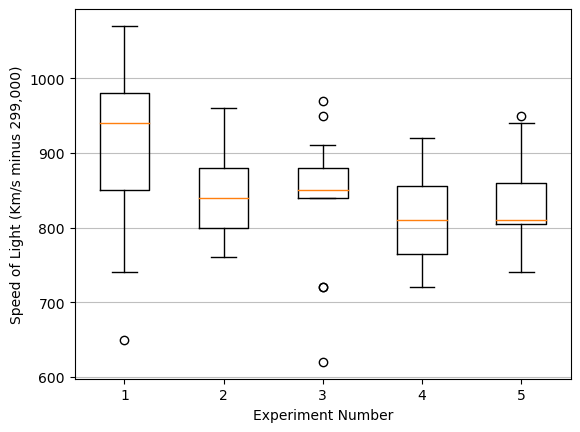

In [6]:
# plot the boxplot with all 5 in it.
fig, ax = plt.subplots()

# set dtype to 'object' to remove annoying red error box
plt.boxplot(np.array([sample_1,sample_2,sample_3,sample_4,sample_5], dtype=object))

# add a nice grid to make the distinction between the values even clearer.
ax.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)

# add x and y labels for easy reference.
ax.set_xlabel("Experiment Number")
ax.set_ylabel('Speed of Light (Km/s minus 299,000)');

### Exercise 2

#### Create box plots for all of the numercial variables in Fisher's Iris Data Set.

A similar exercise as above, except this time I had to create a boxplot with the 4 numerical values of the dataset. I followed the same procedure as above.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#give program location of dataset and ask it to ignore the first column of info (which is just numbers in sequence from 0 to 149).
iris_data = np.genfromtxt('data_sets/iris.csv', skip_header=1, delimiter=',', deletechars='"')

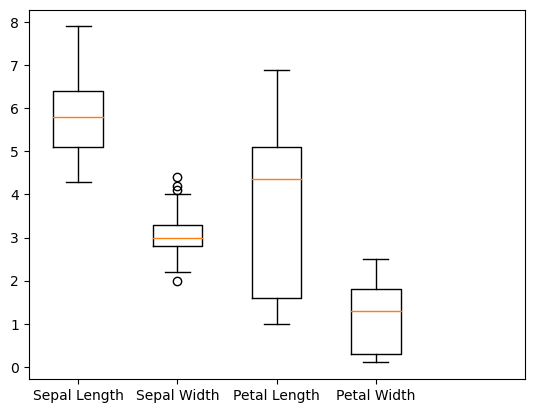

In [8]:
# plot boxplot
fig, ax = plt.subplots()

#designate where program is pulling data from.
plt.boxplot(iris_data)

#add labels to x axis
plt.xticks([1,2,3,4],['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

### Exercise 3

#### Adapt the code and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.

I started this exercise using the code from class, creating plots, changing the + to a minus to invert the plots and then adding noise so that the values weren't all in a straight line. I left the best fit line in the plot for clarity. The first plot is now inversely proportional to the original; while the second plot is also inversely proportional the individual groups within that plot are directly proportional.

In [9]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])

In [10]:
# Create a corresponding series of y vectors. Change the + to a minus to invert the plots below.
ys = np.array([1.0 * xs[i] - 2 * i for i in range(len(xs))])

# add noise 
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

In [11]:
# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

In [12]:
# Best fit line slope and y intercept.
m, c = np.polyfit(x, y, 1)

In [13]:
# Create a steadily increasing x range for plotting.
xbest = np.linspace(x.min(), x.max(), 1000)
# Create corresponding y values form best fit line.
ybest = m * xbest + c

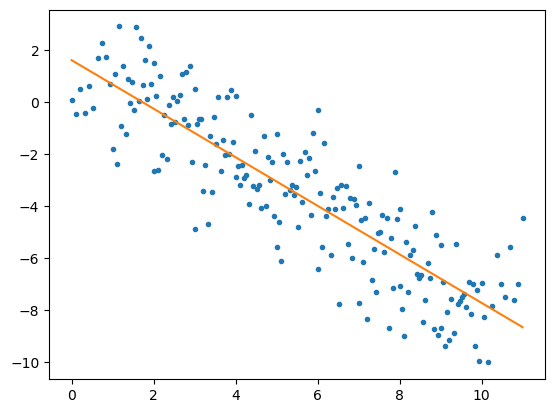

In [14]:
# Plot x + y.
plt.plot(x, y, '.');

# Plot line.
plt.plot(xbest, ybest);

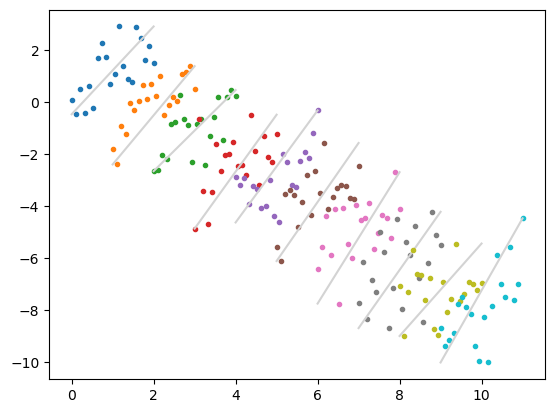

In [15]:
# Same plot but with individual groups directly proportional.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbest = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybest =  np.linspace(ys[i].min(), ys[i].max(), 50)
    # Plot best fit line for category.
    plt.plot(xbest, ybest, color='lightgrey');

# References:

[1] https://stackoverflow.com/questions/47528955/adding-a-legend-to-a-matplotlib-boxplot-with-multiple-plots-on-same-axes

[2] https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html 

[3] https://chartio.com/learn/charts/box-plot-complete-guide/

[4] https://thirdspacelearning.com/gcse-maths/ratio-and-proportion/directly-proportional-graph/

[5] https://www.geeksforgeeks.org/numpy-invert-in-python/

[6] https://www.mathsisfun.com/algebra/directly-inversely-proportional.html

Majority of code used was taken from examples in class - created by Dr. Ian McLoughlin; unless specified otherwise.